 <!-- Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations using
Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable
techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to
decrease the skewness and convert the distribution into a normal distribution.
Reason and document your approach properly -->

 # Step 0: Create the Dataset

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a sample Academic performance dataset
data = {
    'Student_ID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'Name': ['Amit', 'Priya', 'John', 'Sara', 'Alex', 'Nina', 'Tom', 'Emma', 'Leo', 'Maya'],
    'Math_Score': [88, 92, np.nan, 70, 45, 55, 99, 102, 1000, 75],  # 1000 is an outlier
    'Science_Score': [75, 85, 80, 70, 65, np.nan, 95, 90, 89, 78],
    'Attendance(%)': [85, 92, 78, np.nan, 80, 60, 88, 95, 200, 70]  # 200% is inconsistent
}
df = pd.DataFrame(data)
# Create a DataFrame from a dictionary

 # Step 1: Handle Missing Values and Inconsistencies 

In [12]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

print("Dataset without null values: \n", df.dropna())
# Fill missing numerical values with column mean
df['Math_Score'].fillna(df['Math_Score'].mean(), inplace=True)
df['Science_Score'].fillna(df['Science_Score'].mean(), inplace=True)
df['Attendance(%)'].fillna(df['Attendance(%)'].mean(), inplace=True)

# Fix inconsistent Attendance (>100%)
df.loc[df['Attendance(%)'] > 100, 'Attendance(%)'] = 100

# Explanation:
# df['Attendance(%)'] > 100:
# This creates a Boolean mask, identifying all rows where the Attendance(%) value is greater than 100. This is logically inconsistent because a student cannot attend more than 100% of classes.

# df.loc[... , 'Attendance(%)']:
# This uses .loc[] to locate rows where the above condition is True, and targets the Attendance(%) column in those rows.

# = 100:
# This sets the Attendance(%) value to 100 in all the rows where it was originally more than 100.

# The df.loc method in pandas is used for label-based indexing. It helps you access or modify a group of rows and columns in a DataFrame using labels or a boolean array. 
# df.loc[row_indexer, column_indexer]


Missing Values:
 Student_ID       0
Name             0
Math_Score       1
Science_Score    1
Attendance(%)    1
dtype: int64
Dataset without null values: 
    Student_ID   Name  Math_Score  Science_Score  Attendance(%)
0         101   Amit        88.0           75.0           85.0
1         102  Priya        92.0           85.0           92.0
4         105   Alex        45.0           65.0           80.0
6         107    Tom        99.0           95.0           88.0
7         108   Emma       102.0           90.0           95.0
8         109    Leo      1000.0           89.0          200.0
9         110   Maya        75.0           78.0           70.0


C:\Users\Anuj\AppData\Local\Temp\ipykernel_12500\205692773.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Math_Score'].fillna(df['Math_Score'].mean(), inplace=True)
C:\Users\Anuj\AppData\Local\Temp\ipykernel_12500\205692773.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [14]:
df

,Student_ID,Name,Math_Score,Science_Score,Attendance(%)
0,101,Amit,88.000000,75.000000,85.000000
1,102,Priya,92.000000,85.000000,92.000000
2,103,John,180.666667,80.000000,78.000000
3,104,Sara,70.000000,70.000000,94.222222
4,105,Alex,45.000000,65.000000,80.000000
5,106,Nina,55.000000,80.777778,60.000000
6,107,Tom,99.000000,95.000000,88.000000
7,108,Emma,102.000000,90.000000,95.000000
8,109,Leo,1000.000000,89.000000,100.000000
9,110,Maya,75.000000,78.000000,70.000000


# Step 2: Scan for Outliers 

<Axes: >

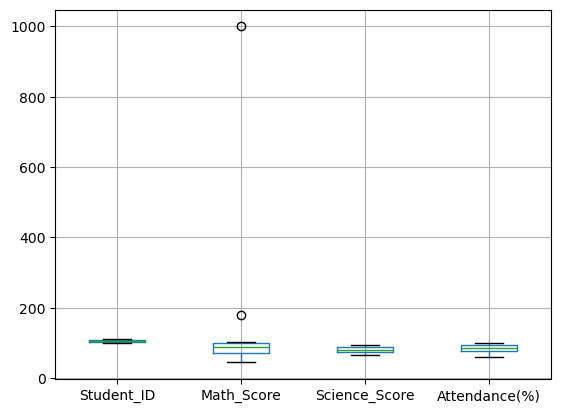

In [17]:
df.boxplot()

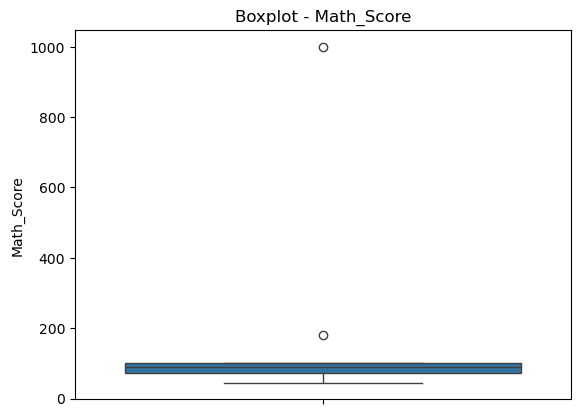

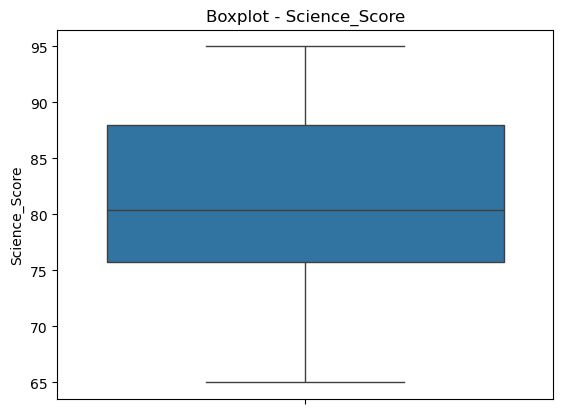

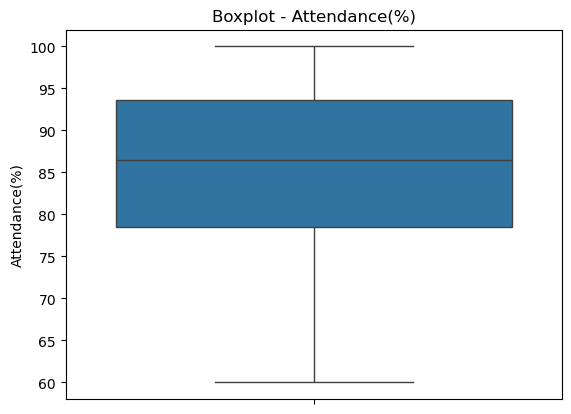

In [19]:
# 3. Boxplot to detect outliers
for col in ['Math_Score', 'Science_Score', 'Attendance(%)']:
    sns.boxplot(y=df[col]) # Plots boxplot with values on the Y-axis
    plt.title(f"Boxplot - {col}") # Adds title to the plot
    plt.show()   # Displays the plot


# What the Boxplot Shows:
# The box shows the interquartile range (IQR) (25th to 75th percentile).

# The line inside the box is the median.

# The "whiskers" show the range within 1.5 * IQR.

# Dots beyond the whiskers are outliers.


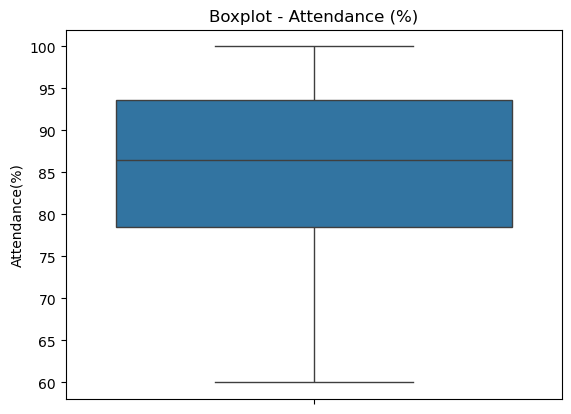

In [20]:
sns.boxplot(y=df['Attendance(%)'])
plt.title("Boxplot - Attendance (%)")
plt.show()


In [23]:
#IQR-Based Outlier Treatment (
# This approach uses the Interquartile Range (IQR) to detect and treat outliers. Instead of removing outliers (which may lose data), it caps them at the boundary values.

# ✅ Steps Explained:
# Q1 = 25th percentile

# Q3 = 75th percentile

# IQR = Q3 - Q1

# Define the lower limit = Q1 − 1.5 × IQR
# Define the upper limit = Q3 + 1.5 × IQR

# Replace values:

# Any value > upper limit → set to upper limit

# Any value < lower limit → set to lower limit

# All other values remain unchanged



def remove_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] > upper, upper,
                 np.where(df[column] < lower, lower, df[column]))
#     This line caps outliers in a column using nested NumPy where() conditions. Let's break it down:

# 🔍 General Form of np.where(condition, value_if_true, value_if_false)

#     ✅ Step-by-step Explanation:
# Outer np.where(df[column] > upper, upper, ...):

# If the value in df[column] is greater than upper, set it to upper.

# Else, move to the inner np.where().

# Inner np.where(df[column] < lower, lower, df[column]):

# If the value is less than lower, set it to lower.

# Else, keep the original value (df[column]).



# Here's how to remove outlier rows instead of capping them, using the same IQR method:
# Keep only rows within the IQR range
    return df[(df[column] >= lower) & (df[column] <= upper)] #insetad of last line

# i.e  

# def remove_outliers_iqr(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower = Q1 - 1.5 * IQR
#     upper = Q3 + 1.5 * IQR
#     return df[(df[column] >= lower) & (df[column] <= upper)]


# Apply to numeric columns
remove_outliers_iqr('Math_Score')
remove_outliers_iqr('Attendance(%)')

#OR 
# Apply outlier removal on all relevant columns
# for col in ['Math_Score', 'Attendance(%)']:
#     remove_outliers_iqr(col)

# Outliers in Math_Score and Attendance(%) are clipped to upper/lower bounds using IQR. 

,Student_ID,Name,Math_Score,Science_Score,Attendance(%)
0,101,Amit,88.00,75.000000,85.000000
1,102,Priya,92.00,85.000000,92.000000
2,103,John,146.25,80.000000,78.000000
3,104,Sara,70.00,70.000000,94.222222
4,105,Alex,45.00,65.000000,80.000000
5,106,Nina,55.00,80.777778,60.000000
6,107,Tom,99.00,95.000000,88.000000
7,108,Emma,102.00,90.000000,95.000000
8,109,Leo,146.25,89.000000,100.000000
9,110,Maya,75.00,78.000000,70.000000


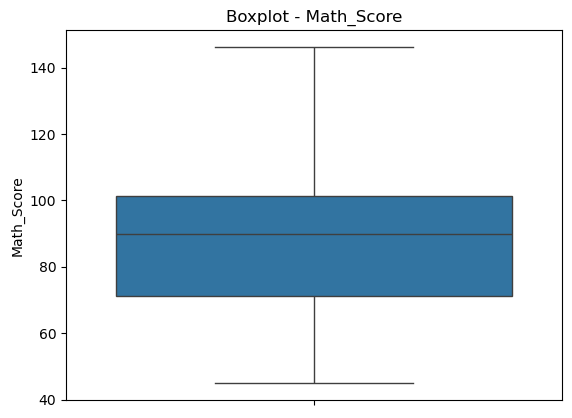

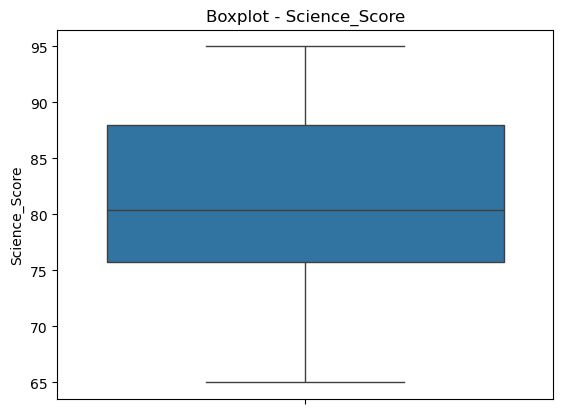

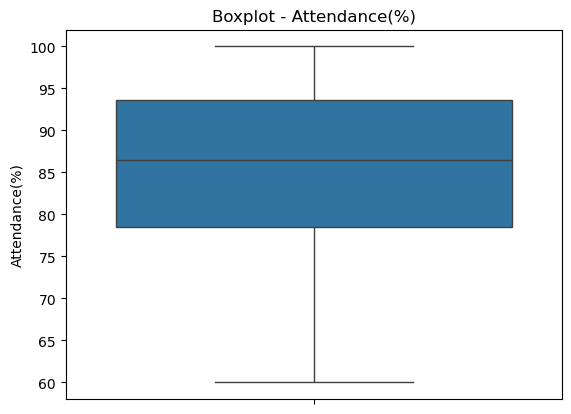

In [27]:
# Plot boxplots to show the data after outlier removal
# plt.figure(figsize=(12, 4))
for col in ['Math_Score', 'Science_Score', 'Attendance(%)']:
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot - {col}")
    plt.show()

In [23]:
#OR

# newdf = df[df["Math_Score"] < 100]
# newdf
# print(newdf)

   Student_ID   Name  Math_Score  Science_Score  Attendance(%)
0         101   Amit        88.0      75.000000      85.000000
1         102  Priya        92.0      85.000000      92.000000
3         104   Sara        70.0      70.000000      94.222222
4         105   Alex        45.0      65.000000      80.000000
5         106   Nina        55.0      80.777778      60.000000
6         107    Tom        99.0      95.000000      88.000000
9         110   Maya        75.0      78.000000      70.000000


# Step 3: Apply data transformation (log transformation for skewness)


Before Transformation:
count      10.000000
mean      180.666667
std       290.253529
min        45.000000
25%        71.250000
50%        90.000000
75%       101.250000
max      1000.000000
Name: Math_Score, dtype: float64


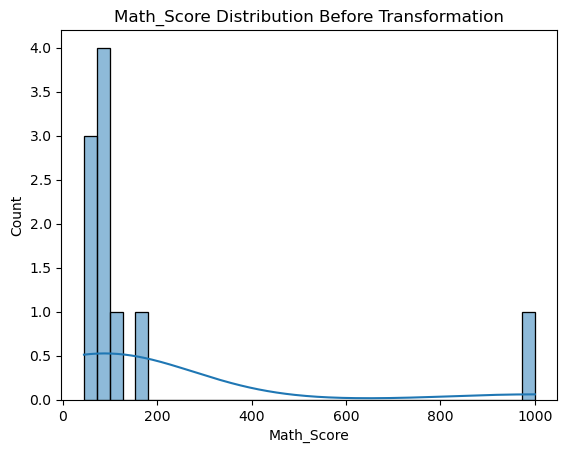


After Transformation:
count    10.000000
mean      4.681947
std       0.866378
min       3.828641
25%       4.279693
50%       4.510618
75%       4.627339
max       6.908755
Name: Math_Score_Log, dtype: float64


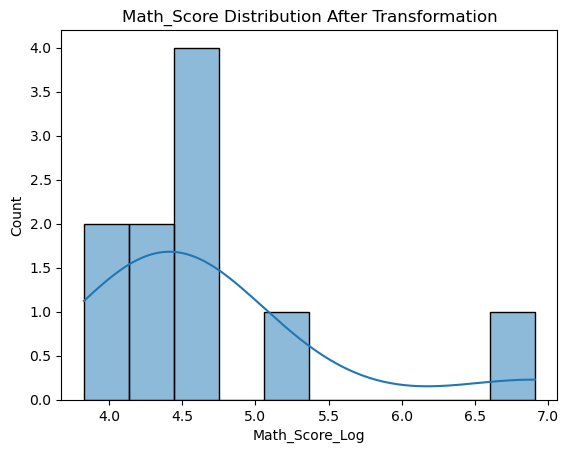

In [39]:
# Before Transformation: Checking the distribution of Math_Score
print("\nBefore Transformation:")
print(df['Math_Score'].describe())

# Plot the original Math_Score distribution
sns.histplot(df['Math_Score'], kde=True)
plt.title("Math_Score Distribution Before Transformation")
plt.show()

# Applying log transformation to Math_Score (log(1 + x) to handle zero or negative values)
df['Math_Score_Log'] = np.log1p(df['Math_Score'])

# After Transformation: Checking the distribution of Log-transformed Math_Score
print("\nAfter Transformation:")
print(df['Math_Score_Log'].describe())

# Plot the transformed Math_Score distribution
sns.histplot(df['Math_Score_Log'], kde=True)
plt.title("Math_Score Distribution After Transformation")
plt.show()

# kde=True means "add a KDE (Kernel Density Estimate) curve" on top of the histogram

# ✅ Full Explanation:
# sns.histplot(...) by default creates a histogram (bar plot showing frequency of values).

# kde=True adds a smooth curve that estimates the probability density function (PDF) of the variable.

# Example:
# A histogram shows: "How many students scored 60–70?"

# The KDE shows: "What is the estimated probability distribution of scores?"

# It's a smooth version of the histogram — good for visualizing the shape of the distribution:

# Is it normal (bell-shaped)?

# Is it skewed?

# Are there multiple peaks?